# Capstone


In [121]:
import pandas as pd
import numpy as np

#Visualization Libraries
import folium
import geopy

#import Beatiful Soup for allowing easier parsing of html
from bs4 import BeautifulSoup
import re

import json
import csv

#http request handlers
import urllib.request as req
import requests

#load environmental vars
import os
from dotenv import load_dotenv

load_dotenv()
KEY = os.getenv('GOOGLE_API_KEY')
CSE = os.getenv('GOOGLE_CSE')
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
VERSION = os.getenv('VERSION')
VERSION = VERSION[0:8]

#Timeout on stalled calls or slow server response
import signal
class TimeoutException(Exception):
    print("timeout!")
    pass

def timeout_handler(signum, frame):  
    raise TimeoutException

# Change the behavior of SIGALRM
signal.signal(signal.SIGALRM, timeout_handler)


#global vars
meta_tags = [
    'title', 'h1', 'h2', 'h3', 'meta'
]

crime_keywords = [
    'assault', 'stabbing', 'rape', 'shooting', 'robbery', 'carjacking', 'murder', 'homicide', 'burglary', 'theft'
]

d = {
    "name": [],
    "geo_2d": [],
    "median_value": []
}

site_lists = {}

#load neighborhoods for Fargo, ND via API
url = "https://data.opendatasoft.com/api/records/1.0/search/?dataset=zillow-neighborhoods%40public&q=Fargo&rows=38&facet=state&facet=county&facet=city&facet=name"
page = req.urlopen(url)
data = json.loads(page.read())
data

geoJSON = {"type": "FeatureCollection", "features": [] }

#neighborhood home value stats from zillow via CSV
n_csv = pd.read_csv( "./Neighborhood_zhvi.csv")

timeout!


In [122]:
#Functions for parsing and collecting data into pandas dataframe

def getSiteList(n):
    q = "{}+Fargo+ND+news+2019".format(n)
    link_list = []
    try:
        res = requests.get("https://www.googleapis.com/customsearch/v1?key=" + KEY + "&cx=" + CSE + "&q=" + q ) 
        res_data = res.json()
        print(res_data, "Google")
        if ( ("items" in res_data.keys()) ):
            for item in res_data['items']:
                link_list.append(item['link'])
    except (Exception, TimeoutException) as e: 
        print(e, "Google Fetch")
    return link_list

#takes a list of keywords and counts the number of times they appear within an html soup
def keywordParser(k_list, soup):
    num = 0 
    for word in k_list:
        for tag in meta_tags:
             num += len(soup.find_all(tag, text = re.compile(word) ))
    return num

#queries google search for list of news articles from 2019 for a neighborhood in Fargo, ND, and checks by keyword list.
def getKeywords(k_list, link_list):
    num = 0
    for link in link_list:
        try:
            signal.alarm(4)
            fetched = BeautifulSoup( req.urlopen( link ), 'html.parser' )
            num += keywordParser(k_list, fetched )
        except (Exception, TimeoutException) as e:
            print(e, "Site Fetch: {}".format( link ) )
            signal.alarm(0)
            continue
    return num

#get median property value for homes valued in 2019
def getMedianValue(n):
    try:
        v = n_csv.loc[(n_csv['RegionName'] == n ) & (n_csv['State'] == 'ND') & (n_csv['City'] == 'Fargo')]['2019-12-31']
        return v.item()
    except Exception as e: print(e)

#iterator for building the initial Pandas DF for neighborhoods.
for neighborhood in data['records']:
    if(neighborhood is None):
        print ( "issue" )
        pass
    else:
        d["name"].append( neighborhood['fields']['name'])
        d["geo_2d"].append(neighborhood['fields']['geo_point_2d'])
        d["median_value"].append( getMedianValue( neighborhood['fields']['name']) )
        site_lists[ neighborhood['fields']['name'] ] = getSiteList(neighborhood['fields']['name'].replace(" ", "+") )


for i, neighborhood in enumerate(data['records']):
    geo = {"type":"Feature", "id": i,"properties":{"name":neighborhood['fields']['name'] }, "geometry": neighborhood["fields"]["geo_shape"] }
    geoJSON["features"].append(geo)
    
    

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Urban Plains Fargo ND news 2019', 'totalResults': '343000', 'searchTerms': 'Urban Plains Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEn

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Northport Fargo ND news 2019', 'totalResults': '153000', 'searchTerms': 'Northport Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Centennial Fargo ND news 2019', 'totalResults': '316000', 'searchTerms': 'Centennial Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncodi

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Anderson Park Fargo ND news 2019', 'totalResults': '974000', 'searchTerms': 'Anderson Park Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'output

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Downtown Fargo ND news 2019', 'totalResults': '752000', 'searchTerms': 'Downtown Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding':

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Trollwood Fargo ND news 2019', 'totalResults': '38200', 'searchTerms': 'Trollwood Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding'

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - South High Fargo ND news 2019', 'totalResults': '1550000', 'searchTerms': 'South High Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncod

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Village West Fargo ND news 2019', 'totalResults': '848000', 'searchTerms': 'Village West Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEn

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Willow Park Fargo ND news 2019', 'totalResults': '585000', 'searchTerms': 'Willow Park Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEnco

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Brandt Crossing Fargo ND news 2019', 'totalResults': '220000', 'searchTerms': 'Brandt Crossing Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'ou

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Lincoln Fargo ND news 2019', 'totalResults': '1280000', 'searchTerms': 'Lincoln Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding': 

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - River Drive Fargo ND news 2019', 'totalResults': '924000', 'searchTerms': 'River Drive Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEnco

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - The District Fargo ND news 2019', 'totalResults': '1080000', 'searchTerms': 'The District Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputE

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Horace Mann Fargo ND news 2019', 'totalResults': '83800', 'searchTerms': 'Horace Mann Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncod

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Prariewood Fargo ND news 2019', 'totalResults': '5560', 'searchTerms': 'Prariewood Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Amber Valley Fargo ND news 2019', 'totalResults': '723000', 'searchTerms': 'Amber Valley Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEn

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Madison/Unicorn Park Fargo ND news 2019', 'totalResults': '494000', 'searchTerms': 'Madison/Unicorn Park Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': '

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Bluemont Lakes Fargo ND news 2019', 'totalResults': '46400', 'searchTerms': 'Bluemont Lakes Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outpu

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Stonebridge Fargo ND news 2019', 'totalResults': '24900', 'searchTerms': 'Stonebridge Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncod

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Westgate Fargo ND news 2019', 'totalResults': '196000', 'searchTerms': 'Westgate Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding':

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - West Acres Fargo ND news 2019', 'totalResults': '623000', 'searchTerms': 'West Acres Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncodi

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Longfellow Fargo ND news 2019', 'totalResults': '35200', 'searchTerms': 'Longfellow Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncodin

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Hawthorne Fargo ND news 2019', 'totalResults': '352000', 'searchTerms': 'Hawthorne Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Osgood Fargo ND news 2019', 'totalResults': '68900', 'searchTerms': 'Osgood Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding': 'utf

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Jefferson/Carl Ben Fargo ND news 2019', 'totalResults': '419000', 'searchTerms': 'Jefferson/Carl Ben Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Davies Fargo ND news 2019', 'totalResults': '777000', 'searchTerms': 'Davies Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding': 'ut

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Clara Barton Fargo ND news 2019', 'totalResults': '444000', 'searchTerms': 'Clara Barton Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEn

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Washington Fargo ND news 2019', 'totalResults': '2060000', 'searchTerms': 'Washington Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncod

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Bennett Fargo ND news 2019', 'totalResults': '641000', 'searchTerms': 'Bennett Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding': '

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Brunsdale Fargo ND news 2019', 'totalResults': '37100', 'searchTerms': 'Brunsdale Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding'

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Maple Valley Fargo ND news 2019', 'totalResults': '579000', 'searchTerms': 'Maple Valley Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEn

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Pointe West Fargo ND news 2019', 'totalResults': '282000', 'searchTerms': 'Pointe West Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEnco

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Southpointe Fargo ND news 2019', 'totalResults': '62700', 'searchTerms': 'Southpointe Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncod

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Rose Creek Fargo ND news 2019', 'totalResults': '643000', 'searchTerms': 'Rose Creek Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncodi

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Deer Creek Fargo ND news 2019', 'totalResults': '561000', 'searchTerms': 'Deer Creek Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncodi

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Woodhaven Fargo ND news 2019', 'totalResults': '144000', 'searchTerms': 'Woodhaven Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outputEncoding

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Lewis and Clark Fargo ND news 2019', 'totalResults': '693000', 'searchTerms': 'Lewis and Clark Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'ou

{'kind': 'customsearch#search', 'url': {'type': 'application/json', 'template': 'https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json'}, 'queries': {'request': [{'title': 'Google Custom Search - Roosevelt/NDSU Fargo ND news 2019', 'totalResults': '30200', 'searchTerms': 'Roosevelt/NDSU Fargo ND news 2019', 'count': 10, 'startIndex': 1, 'inputEncoding': 'utf8', 'outpu

In [125]:
d['crime'] = []

for i, neighborhood in enumerate(data['records']):
    d["crime"].append( getKeywords( crime_keywords, site_lists[ neighborhood['fields']['name'] ] ) )
        
df = pd.DataFrame(data=d)

df.head()

HTTP Error 403: Forbidden Site Fetch: https://kfgo.com/news/
HTTP Error 403: Forbidden Site Fetch: https://www.usnews.com/news/best-states/north-dakota/articles/2020-05-13/2-arrests-in-deadly-fargo-shopping-center-shooting
HTTP Error 403: Forbidden Site Fetch: https://www.rrvunited.org/news/
HTTP Error 403: Forbidden Site Fetch: https://ndacaero.com/2019/07/09/dont-miss-this-years-fargo-airsho/
HTTP Error 403: Forbidden Site Fetch: https://kfgo.com/news/articles/2019/dec/30/fargo-public-works-veteran-calls-storm-once-in-a-decade/970232/
HTTP Error 403: Forbidden Site Fetch: https://kfgo.com/news/
HTTP Error 403: Forbidden Site Fetch: https://kfgo.com/2019/07/18/trollwoods-production-of-freaky-friday-delivers-the-goods/
HTTP Error 403: Forbidden Site Fetch: https://kfgo.com/2018/11/16/trollwood-announces-2019-summer-musical/
HTTP Error 403: Forbidden Site Fetch: https://www.usnews.com/education/best-high-schools/north-dakota/districts/fargo-1/south-high-school-14872
HTTP Error 404: Not 

,name,geo_2d,median_value,crime
0,Urban Plains,"[46.836574641467166, -96.87265685104582]",172891.0,1
1,Northport,"[46.91208209634746, -96.7873426972641]",199628.0,6
2,Centennial,"[46.810595941096686, -96.82881900042028]",354806.0,0
3,Anderson Park,"[46.840068385269, -96.85136018295921]",256873.0,1
4,Downtown,"[46.87692360653518, -96.78838536358272]",162334.0,2


In [126]:
print('The dataframe has {} neighborhoods.'.format( df.shape[0] ))

#include approximately half the dataset
df_half_int = int( int(df.shape[0]) / 2) 
df_number = df_half_int if (df_half_int % 2 == 0) else df_half_int + 1

#convert geo_2d to two Columns
df[['Latitude','Longitude']] = pd.DataFrame(df.geo_2d.tolist(), index= df.index)

#sort by ascending lowest value and descending crime mentions
df.sort_values([ "median_value"], ascending = (True), inplace = True )
df.fillna(df.mean(), inplace=True)
df.head( 38 )

The dataframe has 38 neighborhoods.


,name,geo_2d,median_value,crime,Latitude,Longitude
20,West Acres,"[46.85461941228168, -96.85145192939038]",138122.000000,0,46.854619,-96.851452
4,Downtown,"[46.87692360653518, -96.78838536358272]",162334.000000,2,46.876924,-96.788385
0,Urban Plains,"[46.836574641467166, -96.87265685104582]",172891.000000,1,46.836575,-96.872657
36,Lewis and Clark,"[46.85479487070824, -96.80385914739054]",175561.000000,0,46.854795,-96.803859
27,Washington,"[46.9007639147839, -96.78432180294661]",176311.000000,0,46.900764,-96.784322
7,Village West,"[46.86831735522739, -96.8547657473601]",184982.000000,0,46.868317,-96.854766
13,Horace Mann,"[46.88746126537563, -96.77831059415682]",188015.000000,3,46.887461,-96.778311
8,Willow Park,"[46.854770241943584, -96.86722625601628]",191543.000000,1,46.854770,-96.867226
19,Westgate,"[46.861697621553034, -96.83050726428037]",193444.000000,2,46.861698,-96.830507
22,Hawthorne,"[46.866139479034366, -96.79100601745586]",197327.000000,0,46.866139,-96.791006


In [127]:
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

#get geo coordinates of Fargo, ND 
address = 'Fargo, ND '

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Fargo, ND are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Fargo, ND are 46.877229, -96.789821.


In [359]:
# create map of Fargo using latitude and longitude values
map_fargo = folium.Map(location=[latitude, longitude], zoom_start=10)

#bins = list( df['crime'].quantile([0, 2, 3.5, 5, 6]) )

folium.Choropleth(
    geo_data=geoJSON,
    data=df,
    columns=['name', 'median_value'],
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime',
    key_on="feature.properties.name",
).add_to(map_fargo)

# add markers to map
for lat, lng, name in zip(df['Latitude'], df['Longitude'], df['name']):
    label = '{}'.format( name )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fargo)  
    
map_fargo

In [131]:
#invoking the foursquare API per neighborhood to get category list
categories = {}

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
#function that returns most popular venue categories
def popularCategories(cat_list):
    cat_counter = {}
    for cat in cat_list:
        if cat in cat_counter:
            cat_counter[cat] += 1
        else:
            cat_counter[cat] = 1
    categories = sorted(cat_counter, key = cat_counter.get, reverse = True)
    return categories


#iterate through neighborhoods and retrieve venue categries from foursquare API
for lat, lng, name in zip(df['Latitude'], df['Longitude'], df['name']):
    latitude = lat
    longitude =  lng
    radius = 500
    LIMIT = 100
    foursquare_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results = requests.get(foursquare_url).json()
    if 'groups' in results['response']:
        venues = results['response']['groups'][0]['items']
        nearby_venues = pd.json_normalize(venues)
        if 'venue.categories' in nearby_venues.columns:
            nearby_venues = nearby_venues.loc[:, ['venue.categories'] ]
            nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
            categories[name] = popularCategories(nearby_venues['venue.categories'])
            print(categories[name])
    
        

['Hotel', 'Brewery', 'American Restaurant', 'Movie Theater', 'Japanese Restaurant', 'Gym', 'Pizza Place', 'Wings Joint', 'Shopping Mall', 'Optical Shop', 'Video Game Store', 'Coffee Shop', 'Volleyball Court', 'Park', 'Pool Hall']
['Coffee Shop', 'Pizza Place', 'Restaurant', 'American Restaurant', 'Boutique', 'Bar', 'Food Truck', 'Burger Joint', 'Sandwich Place', 'Lounge', 'Gift Shop', 'Cocktail Bar', 'Hotel', 'Mexican Restaurant', 'Bank', 'Music Venue', 'Sports Bar', 'German Restaurant', 'Italian Restaurant', 'Toy / Game Store', 'Brewery', 'Art Museum', 'Donut Shop', 'Plaza', 'Sushi Restaurant', 'Indie Movie Theater', 'Taco Place', 'Gourmet Shop', 'Beer Bar', 'Deli / Bodega', 'Bakery', 'Juice Bar', 'Bagel Shop', 'Arts & Crafts Store', 'Record Shop', 'Pub', 'Theater', 'Spa', 'Art Gallery', 'Gym', 'Event Space', 'ATM', 'Dessert Shop', 'Nightclub', 'Sporting Goods Shop', 'Board Shop', 'Lawyer']
['Stadium', 'Skating Rink', 'Sports Bar', 'Performing Arts Venue', 'Food & Drink Shop', 'Gym / 

In [134]:
#Add Categories to the primary df\

df['Categories'] = df['name'].map(categories)

df.loc[df['Categories'].isnull(),['Categories']] = df.loc[df['Categories'].isnull(),'Categories'].apply(lambda x: [])

df.head(38)

,name,geo_2d,median_value,crime,Latitude,Longitude,Categories
20,West Acres,"[46.85461941228168, -96.85145192939038]",138122.000000,0,46.854619,-96.851452,"[Hotel, Brewery, American Restaurant, Movie Th..."
4,Downtown,"[46.87692360653518, -96.78838536358272]",162334.000000,2,46.876924,-96.788385,"[Coffee Shop, Pizza Place, Restaurant, America..."
0,Urban Plains,"[46.836574641467166, -96.87265685104582]",172891.000000,1,46.836575,-96.872657,"[Stadium, Skating Rink, Sports Bar, Performing..."
36,Lewis and Clark,"[46.85479487070824, -96.80385914739054]",175561.000000,0,46.854795,-96.803859,"[American Restaurant, Pharmacy, Bakery, Asian ..."
27,Washington,"[46.9007639147839, -96.78432180294661]",176311.000000,0,46.900764,-96.784322,"[Pizza Place, Park, Tennis Court]"
7,Village West,"[46.86831735522739, -96.8547657473601]",184982.000000,0,46.868317,-96.854766,"[Gift Shop, Office, Dog Run]"
13,Horace Mann,"[46.88746126537563, -96.77831059415682]",188015.000000,3,46.887461,-96.778311,"[Baseball Field, New American Restaurant, Play..."
8,Willow Park,"[46.854770241943584, -96.86722625601628]",191543.000000,1,46.854770,-96.867226,"[Sporting Goods Shop, Mexican Restaurant, Pizz..."
19,Westgate,"[46.861697621553034, -96.83050726428037]",193444.000000,2,46.861698,-96.830507,"[Hotel, Shipping Store, Café, Kids Store, Disc..."
22,Hawthorne,"[46.866139479034366, -96.79100601745586]",197327.000000,0,46.866139,-96.791006,"[Playground, Baseball Field, Park]"


In [135]:
# List of all unique Categories
import itertools
df.Categories.fillna({}, inplace=True)
df.head(38)

unique_cats = set(itertools.chain.from_iterable(df.Categories))
unique_cats

{'ATM',
 'American Restaurant',
 'Arcade',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Automotive Shop',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Beer Bar',
 'Beer Garden',
 'Board Shop',
 'Boutique',
 'Brewery',
 'Burger Joint',
 'Bus Station',
 'Business Service',
 'Cafeteria',
 'Café',
 'Chinese Restaurant',
 'Cocktail Bar',
 'Coffee Shop',
 'Construction & Landscaping',
 'Deli / Bodega',
 'Dessert Shop',
 'Discount Store',
 'Dive Bar',
 "Doctor's Office",
 'Dog Run',
 'Donut Shop',
 'Event Space',
 'Fast Food Restaurant',
 'Food',
 'Food & Drink Shop',
 'Food Truck',
 'Football Stadium',
 'Furniture / Home Store',
 'Gaming Cafe',
 'Garden',
 'Garden Center',
 'Gas Station',
 'German Restaurant',
 'Gift Shop',
 'Golf Course',
 'Gourmet Shop',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Gymnastics Gym',
 'Hardware Store',
 'Health & Beauty Service',
 'Home Service',
 'Hotel',
 'Ice Cream Shop',
 

In [136]:
# Generate a weighted tuple from which to create a neighborhood Cat Index.
cat_dict = {'Bar': 1, 
             'Beer Bar': 2, 
             'Beer Garden': 2,
             'Brewery': 3, 
             'Café': 1,
             'Coffee Shop': 2, 
             'Dive Bar': 2, 
             'Hotel': 1,
             'Music Venue': 3,
             'Performing Arts Venue': 3,
             'Restaurant': 1,
             'Skating Rink': 1,
             'Video Store': 3,
             'Wine Shop': 3,
             'Gaming Cafe': 3,
             'Arcade' : 3,
             'Art Gallery': 3,
             'Art Museum': 2,
             'Nightclub': 1,
             'Record Shop': 2,
             'Arts & Crafts Store': 1,
             'Board Shop': 3
             
            }

def cat_iterator(cat_array):
    num = 0
    for cat in cat_array:
        if cat in cat_dict.keys():
            num += cat_dict[ cat ] 
    return num
    
    
df["Category Index"] = df["Categories"].apply(cat_iterator)

In [139]:
df_cat = df.sort_values([ "Category Index","median_value", "crime"], ascending = (False, True, True) )
df_cat.head()

,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
4,Downtown,"[46.87692360653518, -96.78838536358272]",162334.000000,2,46.876924,-96.788385,"[Coffee Shop, Pizza Place, Restaurant, America...",25,1.00
37,Roosevelt/NDSU,"[46.890958406329766, -96.80189618132387]",249910.529412,0,46.890958,-96.801896,"[ATM, Sandwich Place, Dive Bar, Coffee Shop, B...",7,0.28
20,West Acres,"[46.85461941228168, -96.85145192939038]",138122.000000,0,46.854619,-96.851452,"[Hotel, Brewery, American Restaurant, Movie Th...",6,0.24
19,Westgate,"[46.861697621553034, -96.83050726428037]",193444.000000,2,46.861698,-96.830507,"[Hotel, Shipping Store, Café, Kids Store, Disc...",6,0.24
1,Northport,"[46.91208209634746, -96.7873426972641]",199628.000000,6,46.912082,-96.787343,"[Grocery Store, Coffee Shop, Video Store, Disc...",5,0.20


In [142]:
# create new map of Fargo using latitude and longitude values
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_fargo_cat = folium.Map(location=[latitude, longitude], zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON,
    data=df,
    columns=['name', 'Category Index'],
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Category Index',
    key_on="feature.properties.name",
    bins=8
).add_to(map_fargo_cat)

# add markers to map
for lat, lng, name, cat in zip(df['Latitude'], df['Longitude'], df['name'], df["Categories"]):
    cat = "".join(map(lambda c: "<li>{}</li>".format(c), cat ))
    html = folium.Html("<div><h6>{}</h6><ul>{}</ul></div>".format( name, cat ) , script=True)
    label = folium.Popup(html=html, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fargo_cat)  
    
map_fargo_cat

In [147]:
#this would be improved somewhat by normalizing the category index values
from sklearn import preprocessing

x = df_cat[['Category Index']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
df_cat["Category Index N"] = min_max_scaler.fit_transform(x)

df_cat.head()

,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
4,Downtown,"[46.87692360653518, -96.78838536358272]",162334.000000,2,46.876924,-96.788385,"[Coffee Shop, Pizza Place, Restaurant, America...",25,1.00
37,Roosevelt/NDSU,"[46.890958406329766, -96.80189618132387]",249910.529412,0,46.890958,-96.801896,"[ATM, Sandwich Place, Dive Bar, Coffee Shop, B...",7,0.28
20,West Acres,"[46.85461941228168, -96.85145192939038]",138122.000000,0,46.854619,-96.851452,"[Hotel, Brewery, American Restaurant, Movie Th...",6,0.24
19,Westgate,"[46.861697621553034, -96.83050726428037]",193444.000000,2,46.861698,-96.830507,"[Hotel, Shipping Store, Café, Kids Store, Disc...",6,0.24
1,Northport,"[46.91208209634746, -96.7873426972641]",199628.000000,6,46.912082,-96.787343,"[Grocery Store, Coffee Shop, Video Store, Disc...",5,0.20


In [148]:
map_fargo_cat = folium.Map(location=[latitude, longitude], zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON,
    data=df_cat,
    columns=['name', 'Category Index N'],
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Category Index',
    key_on="feature.properties.name",
    bins=8
).add_to(map_fargo_cat)

# add markers to map, as well only show useful categories in popup
for lat, lng, name, cat in zip(df_cat['Latitude'], df_cat['Longitude'], df_cat['name'], df_cat["Categories"]):
    cat = [c for c in cat if c in cat_dict.keys()]
    cat = "".join(map(lambda c: "<li>{}</li>".format(c), cat ))
    html = folium.Html("<div><h6>{}</h6><ul>{}</ul></div>".format( name, cat ) , script=True)
    label = folium.Popup(html=html, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#5ca',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fargo_cat)  
    
map_fargo_cat

In [229]:
#isolate useful values in preparation for K-Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_onehot = pd.get_dummies(df_cat[['Category Index', 'median_value', 'crime']], prefix="", prefix_sep="")
df_onehot['name'] = df_cat['name'] 

fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

#standardize the independent variables
df_onehot.head(10)
df_onehot_test = df_onehot.drop('name', 1)
df_onehot_test = pd.DataFrame(scaler.fit_transform(df_onehot_test), columns=['Category Index', 'median_value', 'crime'])
df_onehot_test.head(5)

,Category Index,median_value,crime
0,5.360533,-1.362592e+00,0.871672
1,1.150884,-4.528227e-16,-0.633943
2,0.917014,-1.739303e+00,-0.633943
3,0.917014,-8.785554e-01,0.871672
4,0.683145,-7.823393e-01,3.882901


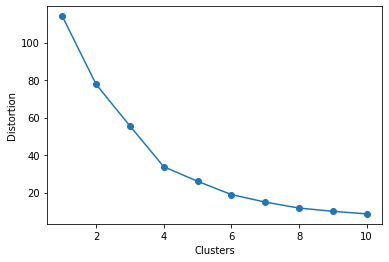

In [362]:
# import k-means from clustering stage and pyplot for different visuals
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# determine the number of clusters that should be used for grouping
distortions = []
for i in range(1, 11):
    km = KMeans( n_clusters=i, n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(df_onehot_test)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

###### After testing the number of clusters, it appears that the ideal number of clusters should be between 4 and 6, 4 being most likely.

In [233]:
df_onehot_first = df_onehot.drop('name', 1)
df_onehot_first = pd.DataFrame(scaler.fit_transform(df_onehot_first), columns=['Category Index', 'median_value', 'crime'])

if 'Cluster Labels' in df_cat.columns:
    df_cat = df_cat.drop(['Cluster Labels'], axis=1)
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_onehot_first)

df_cat.insert(0, 'Cluster Labels', kmeans.labels_)
kmeans.labels_
df_cat.head()

,Cluster Labels,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
4,3,Downtown,"[46.87692360653518, -96.78838536358272]",162334.000000,2,46.876924,-96.788385,"[Coffee Shop, Pizza Place, Restaurant, America...",25,1.00
37,1,Roosevelt/NDSU,"[46.890958406329766, -96.80189618132387]",249910.529412,0,46.890958,-96.801896,"[ATM, Sandwich Place, Dive Bar, Coffee Shop, B...",7,0.28
20,1,West Acres,"[46.85461941228168, -96.85145192939038]",138122.000000,0,46.854619,-96.851452,"[Hotel, Brewery, American Restaurant, Movie Th...",6,0.24
19,2,Westgate,"[46.861697621553034, -96.83050726428037]",193444.000000,2,46.861698,-96.830507,"[Hotel, Shipping Store, Café, Kids Store, Disc...",6,0.24
1,2,Northport,"[46.91208209634746, -96.7873426972641]",199628.000000,6,46.912082,-96.787343,"[Grocery Store, Coffee Shop, Video Store, Disc...",5,0.20


In [363]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.Choropleth(
    geo_data=geoJSON,
    data=df_cat,
    columns=['name', 'Cluster Labels'],
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Category Index',
    key_on="feature.properties.name",
    bins=8
).add_to(map_clusters)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_cat['Latitude'], df_cat['Longitude'], df_cat['name'],df_cat['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [235]:
df_cat.loc[df_cat['Cluster Labels'] == 3, df_cat.columns[[1] + list(range(1, df_cat.shape[1]))]]

,name,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
4,Downtown,Downtown,"[46.87692360653518, -96.78838536358272]",162334.0,2,46.876924,-96.788385,"[Coffee Shop, Pizza Place, Restaurant, America...",25,1.0


###### Cluster 3, having only one item, is the most likely winner. Featuring a low median property value and a Category index that is effectively an outlier, as well as a fairly low-to-moderate level of newsworthy crime, it is clearly the winning cluster.

In [236]:
df_cat.loc[df_cat['Cluster Labels'] == 1, df_cat.columns[[1] + list(range(1, df_cat.shape[1]))]]

,name,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
37,Roosevelt/NDSU,Roosevelt/NDSU,"[46.890958406329766, -96.80189618132387]",249910.529412,0,46.890958,-96.801896,"[ATM, Sandwich Place, Dive Bar, Coffee Shop, B...",7,0.28
20,West Acres,West Acres,"[46.85461941228168, -96.85145192939038]",138122.000000,0,46.854619,-96.851452,"[Hotel, Brewery, American Restaurant, Movie Th...",6,0.24
0,Urban Plains,Urban Plains,"[46.836574641467166, -96.87265685104582]",172891.000000,1,46.836575,-96.872657,"[Stadium, Skating Rink, Sports Bar, Performing...",4,0.16
8,Willow Park,Willow Park,"[46.854770241943584, -96.86722625601628]",191543.000000,1,46.854770,-96.867226,"[Sporting Goods Shop, Mexican Restaurant, Pizz...",4,0.16
36,Lewis and Clark,Lewis and Clark,"[46.85479487070824, -96.80385914739054]",175561.000000,0,46.854795,-96.803859,"[American Restaurant, Pharmacy, Bakery, Asian ...",2,0.08
28,Bennett,Bennett,"[46.79666936854534, -96.8094638215277]",220395.000000,0,46.796669,-96.809464,"[Garden, Movie Theater, Beer Garden]",2,0.08
27,Washington,Washington,"[46.9007639147839, -96.78432180294661]",176311.000000,0,46.900764,-96.784322,"[Pizza Place, Park, Tennis Court]",0,0.00
7,Village West,Village West,"[46.86831735522739, -96.8547657473601]",184982.000000,0,46.868317,-96.854766,"[Gift Shop, Office, Dog Run]",0,0.00
22,Hawthorne,Hawthorne,"[46.866139479034366, -96.79100601745586]",197327.000000,0,46.866139,-96.791006,"[Playground, Baseball Field, Park]",0,0.00
29,Brunsdale,Brunsdale,"[46.84020051500995, -96.80922292510077]",202413.000000,0,46.840201,-96.809223,[Park],0,0.00


###### The broadest and most varied Cluster, virtually no newsworthy crime, low-to-moderate property values, but varied Category Index values. This should likely comrise two Clusters, so perhaps 5 clusters would have been a better choice.

In [237]:
df_cat.loc[df_cat['Cluster Labels'] == 2, df_cat.columns[[1] + list(range(1, df_cat.shape[1]))]]

,name,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
19,Westgate,Westgate,"[46.861697621553034, -96.83050726428037]",193444.000000,2,46.861698,-96.830507,"[Hotel, Shipping Store, Café, Kids Store, Disc...",6,0.24
1,Northport,Northport,"[46.91208209634746, -96.7873426972641]",199628.000000,6,46.912082,-96.787343,"[Grocery Store, Coffee Shop, Video Store, Disc...",5,0.20
18,Stonebridge,Stonebridge,"[46.82538659597491, -96.82967760688751]",240666.000000,4,46.825387,-96.829678,"[Bar, Park, Gym / Fitness Center, Food, Skatin...",4,0.16
6,South High,South High,"[46.854473178182296, -96.81436889021946]",203611.000000,2,46.854473,-96.814369,"[Pool, Baseball Field, Gym, Gymnastics Gym, Fo...",2,0.08
15,Amber Valley,Amber Valley,"[46.84391922116873, -96.87254628343662]",249910.529412,2,46.843919,-96.872546,"[Hotel, Dog Run, Business Service]",1,0.04
13,Horace Mann,Horace Mann,"[46.88746126537563, -96.77831059415682]",188015.000000,3,46.887461,-96.778311,"[Baseball Field, New American Restaurant, Play...",0,0.00
14,Prariewood,Prariewood,"[46.85083831773971, -96.83028795367157]",269662.000000,2,46.850838,-96.830288,"[Park, Golf Course, Intersection]",0,0.00


###### Category 2 has the most news-worthy crime, and moderate property values and Category Index. Could work but other options might be better

In [239]:
df_cat.loc[df_cat['Cluster Labels'] == 0, df_cat.columns[[1] + list(range(1, df_cat.shape[1]))]]

,name,name,geo_2d,median_value,crime,Latitude,Longitude,Categories,Category Index,Category Index N
35,Woodhaven,Woodhaven,"[46.81191786548622, -96.8502393632467]",327199.0,0,46.811918,-96.850239,"[Soccer Field, Gaming Cafe, Cafeteria]",3,0.12
25,Davies,Davies,"[46.78169772319953, -96.81242693179446]",337333.0,0,46.781698,-96.812427,"[Soccer Field, Baseball Field, Pool, Music Venue]",3,0.12
30,Maple Valley,Maple Valley,"[46.7952668722038, -96.82732167150228]",291036.0,0,46.795267,-96.827322,"[Park, Beer Bar]",2,0.08
12,The District,The District,"[46.80045510656679, -96.85007415418862]",362602.0,0,46.800455,-96.850074,"[Liquor Store, Coffee Shop]",2,0.08
33,Rose Creek,Rose Creek,"[46.810436770978285, -96.80939799337685]",442887.0,0,46.810437,-96.809398,"[Golf Course, Moving Target, Bar, Scenic Lookout]",1,0.04
23,Osgood,Osgood,"[46.811649995636806, -96.87909703483392]",276065.0,0,46.811650,-96.879097,[Scenic Lookout],0,0.00
31,Pointe West,Pointe West,"[46.826384663528124, -96.85080136271905]",290363.0,1,46.826385,-96.850801,"[Shop & Service, Playground, Gym]",0,0.00
17,Bluemont Lakes,Bluemont Lakes,"[46.84006864964913, -96.83024841404284]",297511.0,0,46.840069,-96.830248,"[Fast Food Restaurant, Gym, Park]",0,0.00
21,Longfellow,Longfellow,"[46.92056617522748, -96.76812948587153]",308315.0,2,46.920566,-96.768129,"[Construction & Landscaping, Furniture / Home ...",0,0.00
9,Brandt Crossing,Brandt Crossing,"[46.825711536184194, -96.87237309057234]",308503.0,1,46.825712,-96.872373,[],0,0.00


###### Category 0 has limited Category intersection and newsworthy crime, but generally the highest median property values - likely the most poor fit

In [365]:
y = kmeans.predict(df_onehot_first)
y

array([3, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

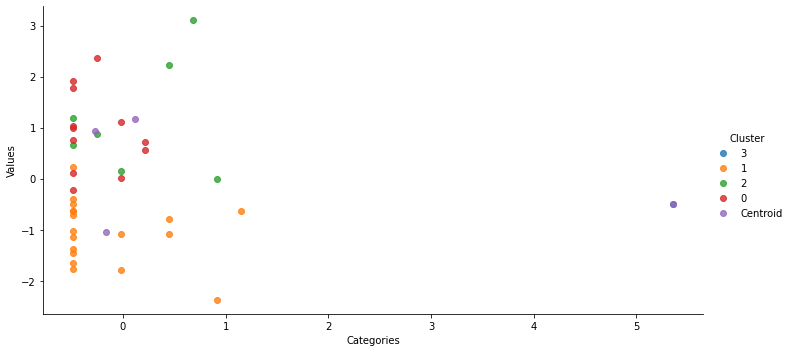

In [366]:
import seaborn as sns

# merge values vs categorie
X, Y = np.vstack((df_onehot_first.iloc[:, 0 ], df_onehot_first.iloc[:, 1 : 3].sum(axis=1) ))
centroidX, centroidY = np.vstack((kmeans.cluster_centers_[:, 0 ], kmeans.cluster_centers_[:, 1 : 3].sum(axis=1) ))
centroidLabel = ["Centroid", "Centroid", "Centroid", "Centroid"]
Y = np.concatenate((Y, centroidY ), axis=0 )
X = np.concatenate((X, centroidX ), axis=0 )
y = np.concatenate((y, centroidLabel ), axis=0 )

df_sp = pd.DataFrame({'Values':  Y, 'Categories' : X, 'Cluster' : y})
df_sp.head()

sns.lmplot(x='Categories', y='Values', hue='Cluster', data=df_sp, fit_reg=False, aspect = 2 )


### Cluster 3 is a definite outlier in this plot